<a href="https://colab.research.google.com/github/khyatiiisingh/Vehicle_cut_in_detection/blob/main/Copy_of_khyati_62_mlds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

khyatisingh77_ta_snehakhyati_path = kagglehub.dataset_download('khyatisingh77/ta-snehakhyati')
khyatisingh77_efficientnetb7_notop_path = kagglehub.dataset_download('khyatisingh77/efficientnetb7-notop')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2| Importing libraries

In [ ]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# 3| Getting the path and Loading the data

In [ ]:
train_data = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv")
test_data = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv")

In [ ]:
train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*")
test_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/test/*")

In [ ]:
train_data

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [ ]:
train_data.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [ ]:
import plotly.express as px
HAR = train_data.label.value_counts()
fig = px.pie(train_data, values=HAR.values, names=HAR.index, title='Distribution of Human Activity')
fig.show()

In [ ]:
filename = train_data['filename']

situation = train_data['label']

In [ ]:
filename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

# 4| Making function that take random path and display the image

In [ ]:
def displaying_random_images():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "../input/human-action-recognition-har-dataset/Human Action Recognition/train/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

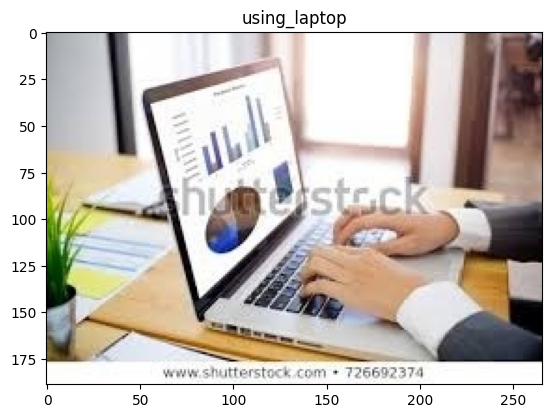

In [ ]:
displaying_random_images()

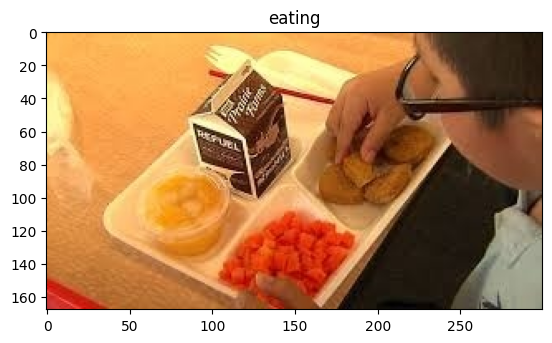

In [ ]:
displaying_random_images()

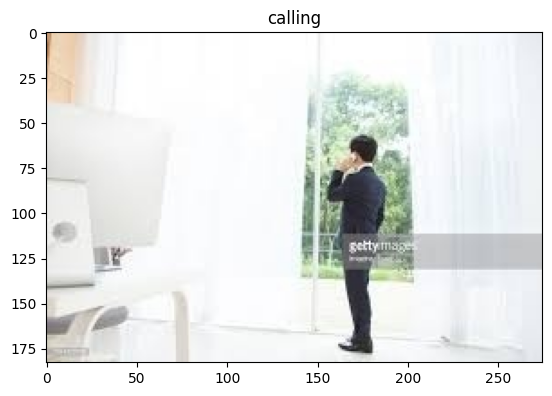

In [ ]:
displaying_random_images()

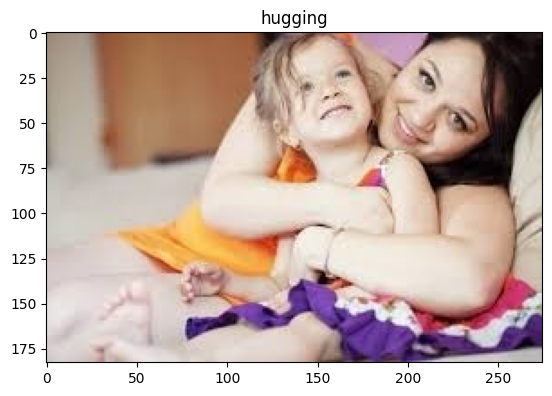

In [ ]:
displaying_random_images()

# 5| Data preprocessing

In [ ]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + filename[i]
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

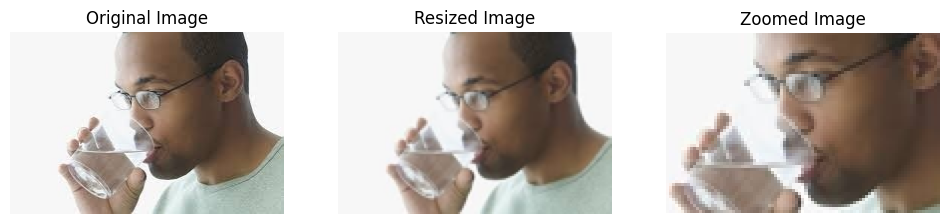

In [ ]:
def display_resized_and_zoomed_image(train_directory, zoom_factor=1.5):
    # List all image files in the training directory
    image_files = [f for f in os.listdir(train_directory) if f.endswith('.jpg')]

    # Randomly select an image
    random_image = random.choice(image_files)
    img_path = os.path.join(train_directory, random_image)

    # Load the original image
    original_image = Image.open(img_path)

    # Resize the image (for demonstration, reducing size by half)
    resized_image = original_image.resize((int(original_image.width / 2), int(original_image.height / 2)))

    # Zoom in: crop the center of the resized image
    width, height = resized_image.size
    new_width = int(width / zoom_factor)
    new_height = int(height / zoom_factor)
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2

    zoomed_image = resized_image.crop((left, top, right, bottom))

    # Display the original and resized images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(resized_image)
    plt.title("Resized Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(zoomed_image)
    plt.title("Zoomed Image")
    plt.axis('off')
    plt.show()

# Set the path to your training images directory
train_directory = "/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train"
display_resized_and_zoomed_image(train_directory)

In [ ]:
img_shape= (160,160,3)

In [ ]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [ ]:
y_train = to_categorical(np.asarray(train_data["label"].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 6| Make an CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow as tf

# Define the model
efficientnet_model = Sequential()

# EfficientNetB7 model (exclude the top classification layer and specify the input shape)
model = tf.keras.applications.EfficientNetB7(include_top=False,
                                             input_shape=(160, 160, 3),
                                             pooling="avg",  # Use global average pooling
                                             weights=None)  # We set weights=None to load local weights

# Load local weights (replace with the correct local file path)
model.load_weights('/kaggle/input/efficientnetb7-notop/efficientnetb7_notop.h5')  # Change this path to the correct one

# Freeze the layers of EfficientNetB7 so they are not trainable
for layer in model.layers:
    layer.trainable = True
# Add EfficientNetB7 as a base model to the sequential model
efficientnet_model.add(model)

# Add custom layers for classification
efficientnet_model.add(Flatten())  # Flatten the output of EfficientNetB7
efficientnet_model.add(Dense(512, activation="relu"))  # Fully connected layer with ReLU activation
efficientnet_model.add(Dense(15, activation="softmax"))  # Output layer for 15 classes with softmax

# Display the model summary
efficientnet_model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 512)               1311232   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 65416614 (249.54 MB)
Trainable params: 65105887 (248.36 MB)
Non-trainable params: 310727 (1.19 MB)
_________________________________________________________________


In [ ]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
efficientnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 512)               1311232   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 65416614 (249.54 MB)
Trainable params: 65105887 (248.36 MB)
Non-trainable params: 310727 (1.19 MB)
_________________________________________________________________


In [ ]:
history = efficientnet_model.fit(iii,y_train,epochs=1)

394/394 [==============================] - 6331s 16s/step - loss: 1.1226 - accuracy: 0.6602


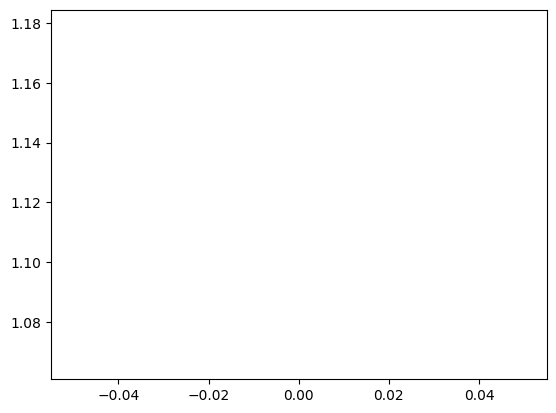

In [ ]:
losses = history.history["loss"]
plt.plot(losses)

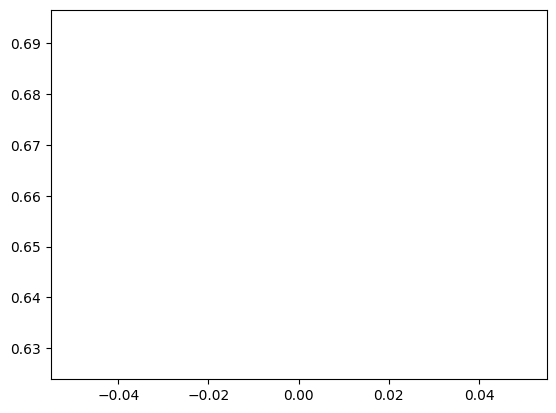

In [ ]:
acc = history.history['accuracy']
plt.plot(acc)

# 7| Model predictions

In [ ]:
def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((160,160)))

In [ ]:
def test_predict(test_image):
    result = efficientnet_model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 8s 8s/step
probability: 86.28180623054504%
Predicted class :  6


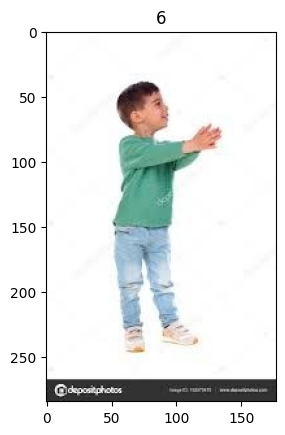

In [ ]:
test_predict("/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1001.jpg")

1/1 [==============================] - 0s 212ms/step
probability: 99.17627573013306%
Predicted class :  4


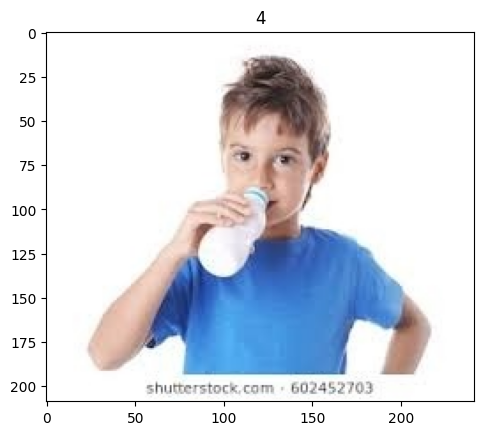

In [ ]:
test_predict("/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_101.jpg")

1/1 [==============================] - 0s 224ms/step
probability: 36.984121799468994%
Predicted class :  5


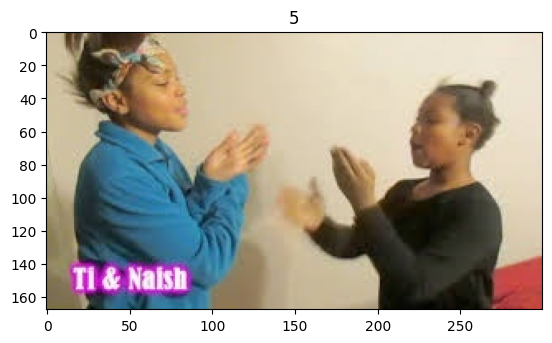

In [ ]:
test_predict("/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1056.jpg")

1/1 [==============================] - 0s 219ms/step
probability: 94.48351263999939%
Predicted class :  12


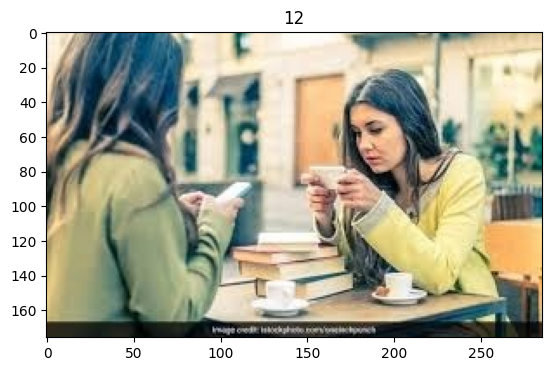

In [ ]:
test_predict("/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_1024.jpg")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load training and testing CSV files
train_csv_path = '/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv'
test_csv_path = '/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv'  # Change this to your test CSV path

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Display the first few rows to understand the structure of the data
print(train_df.head())
print(test_df.head())

# Load images and preprocess them (resize and normalize)
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load image from path
    img = image.load_img(image_path, target_size=target_size)

    # Convert image to array
    img_array = image.img_to_array(img)

    # Preprocess the image (for VGG16, we use preprocess_input)
    img_array = preprocess_input(img_array)

    return img_array

# Preprocessing train and test images
# Load images and convert them to a numpy array
X_train = np.array([load_and_preprocess_image(os.path.join('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train', img_path)) for img_path in train_df['filename']])
X_test = np.array([load_and_preprocess_image(os.path.join('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test', img_path)) for img_path in test_df['filename']])

# The labels are categorical, so we need to encode them
le = LabelEncoder()
y_train = le.fit_transform(train_df['label'])
y_test = le.transform(test_df['label'])

# Flatten the images (convert each image to a 1D vector of pixel values)
# This is necessary for using DecisionTreeClassifier since it expects 2D input
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Train-test split (not needed here because we already have separate train and test datasets)
# X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.25, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_flattened, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test_flattened)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=[f'pixel_{i}' for i in range(X_train_flattened.shape[1])], class_names=le.classes_, filled=True, rounded=True)
plt.show()


      filename         label
0  Image_1.jpg       sitting
1  Image_2.jpg  using_laptop
2  Image_3.jpg       hugging
3  Image_4.jpg      sleeping
4  Image_5.jpg  using_laptop
      filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg


KeyboardInterrupt: 

In [ ]:
# Print column names of the train and test CSV files to check the actual headers
print(train_df.columns)
print(test_df.columns)


Index(['filename', 'label'], dtype='object')
Index(['filename'], dtype='object')
